# Gaussian Puff

A gaussian puff model assumes the release is instantaneous, and all mass is concentrated in a single point. The cloud then disperses as it moves downwind with the concentration profile is given by a series of gaussians with dispersions $\sigma_x$, $\sigma_y$, and $\sigma_z$, which are found from correlations tabulated per stability class. Similarly to the plume model, a ground reflection term is included to correct for the fact that material cannot pass through the ground.

$$ c_{puff} = { m \over { (2 \pi)^{3/2} \sigma_x \sigma_y \sigma_z } } 
\exp \left( -\frac{1}{2} \left( {x - ut} \over \sigma_x \right)^2 \right) 
\exp \left( -\frac{1}{2} \left( {y} \over \sigma_y \right)^2 \right) \\
\times \left[ \exp \left( -\frac{1}{2} \left( {z - h} \over \sigma_z \right)^2 \right) 
+ \exp \left( -\frac{1}{2} \left( {z + h} \over \sigma_z \right)^2 \right)\right]$$

with
- $c_{puff}$ - mass concentration (kg/m^3)
- *m* - mass of release (kg)
- *u* - windspeed (m/s)
-  $\sigma_x$  - downwind dispersion (m)
-  $\sigma_y$  - crosswind dispersion (m)
-  $\sigma_z$  - vertical dispersion (m)
- *h* - release elevation (m)

The model assumes the initial release is a single point, with no dimensions. It is often worthwhile to estimate the initial dimensions of the cloud and calculate a *virtual* emission point to compensate for this.

Unlike the plume model, this concentration is a function of time.

## Windspeed correlations

The windspeed, $u$, at the release height, $h$, is given by

$$ u = u_{R} \left( h \over h_{R} \right)^{\alpha} $$

Where $u_{R}$ is the windspeed set for the `Atmosphere` and $h_{R}$ is the reference height for that windspeed. The parameter $\alpha$ is tabulated based on stability class:

| Stability Class | $\alpha$ |
|:---------------:|:--------:|
|        A        |  0.108   |
|        B        |  0.112   |
|        C        |  0.120   |
|        D        |  0.142   |
|        E        |  0.203   |
|        F        |  0.253   |


## Crosswind dispersion correlations

The crosswind dispersion, $\sigma_{y}$ is a function of downwind distance of the cloud center, $x_c$, as well as stability class

$$ \sigma_{y} = \delta {x_c}^{\beta} $$

Where $\delta$, $\beta$, and $\gamma$ are tabulated based on stability class:

| Stability Class | $\delta$ | $\beta$ |
|:---------------:|:--------:|:-------:|
|        A        |  0.18    |   0.92  |
|        B        |  0.14    |   0.92  |
|        C        |  0.10    |   0.92  |
|        D        |  0.06    |   0.92  |
|        E        |  0.04    |   0.92  |
|        F        |  0.02    |   0.89  |

CCPS, *Guidelines for Consequence Analysis of Chemical Releases*, American
Institute of Chemical Engineers, New York, 1999

## Downwind dispersion correlations

The downwind dispersion, $\sigma_{x}$ is a function of downwind distance of the cloud center, $x_c$, as well as stability class

$$ \sigma_{x} = \delta {x_c}^{\beta} $$

Where $\delta$ and $\beta$ are identical to those tabulated for the crosswind dispersion.

## Vertical dispersion correlations

The vertical dispersion, $\sigma_{z}$ is a function of downwind distance of the cloud center, $x_c$, as well as stability class

$$ \sigma_{z} = \delta {x_c}^{\beta} $$

Where $\delta$ and $\beta$ are tabulated based on stability class:

| Stability Class | $\delta$ | $\beta$ |
|:---------------:|:--------:|:-------:|
|        A        |  0.60    |  0.75   |
|        B        |  0.53    |  0.73   |
|        C        |  0.34    |  0.71   |
|        D        |  0.15    |  0.70   |
|        E        |  0.10    |  0.65   |
|        F        |  0.05    |  0.61   |

CCPS, *Guidelines for Consequence Analysis of Chemical Releases*, American
Institute of Chemical Engineers, New York, 1999

## Example

This scenario is adapted from CCPS *Guidelines for Consequence Analysis of
Chemical Releases*, CCPS, pg 47.

Suppose we wish to model the dispersion of gaseous propane from a leak from a storage tank, where the leak is from a 10 mm hole that is 3.5 m above the ground and the propane is at 25°C and 4barg. Assume the discharge coefficient $c_{D} = 0.85$

We suppose, for simplicity, that the leak only lasts for 10 seconds.

In [1]:
using GasDispersion

In [2]:
Patm = 101325 # Pa
P1 = 4e5 + Patm # Pa
T1 = 25 + 273.15 # K

propane = Substance(name = :propane,
                    gas_density = 9.7505, # Propane, NIST Webbook
                    liquid_density = 526.13, # Propane, NIST Webbook
                    reference_temp= T1,
                    reference_pressure= P1,
                    boiling_temp = 231.04, # Propane, NIST Webbook
                    latent_heat = 16.25/44.0956, # Propane, NIST Webbook
                    gas_heat_capacity = 1.6849,    # Propane, NIST Webbook
                    liquid_heat_capacity = 2.2460) # Propane, NIST Webbook

Substance: propane 


In [3]:
scn = scenario_builder(propane, JetSource; 
       phase = :gas,
       diameter = 0.01, # m
       dischargecoef = 0.85,
       k = 1.15,         # heat capacity ratio, from Crane's
       temperature = T1, # K
       pressure = P1,    # Pa
       height = 3.5,     # m, height of hole above the ground
       duration = 10)    # s, duration of the leak

Substance: propane 
Release conditions:
    ṁ: 0.09426204511744017 kg/s 
    Δt: 10 s 
    d: 0.01 m 
    u: 199.34706765725818 m/s 
    h: 3.5 m 
    P: 287952.6877282304 Pa 
    T: 277.3488372093023 K 
    f_l: 0.0  
Atmospheric conditions:
    P: 101325 Pa 
    T: 298.15 K 
    Rs: 287.0500676 J/kg/K 
    u: 1.5 m/s 
    h: 10 m 
    stability: ClassF  


The solution to the Gaussian puff model is easily obtained by

In [4]:
pf = puff(scn, GaussianPuff);

Suppose we are interested in the concentration at some point 100m downwind of the release, along the centerline (y=0) and at a height of 2m.

In [5]:
x = 100 # m, the downwind distance
u = 1.5 # m/s, the windspeed
t = x/u # time when the cloud center arrives

pf(x,0,2,t)

0.009693139876796887

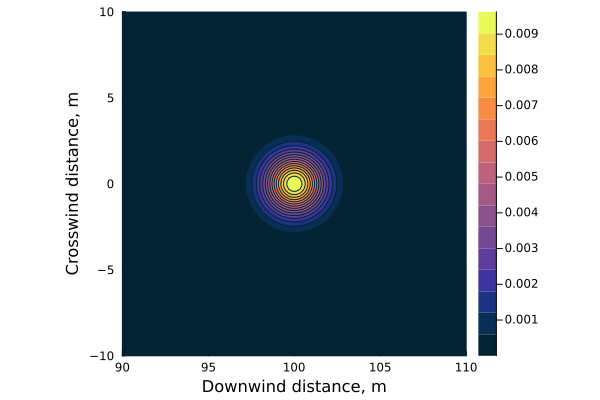

In [6]:
using Plots

plot(pf, t; xlims=(0.9*x,1.1*x), ylims=(-10,10), aspect_ratio=:equal)

Using the `@gif` macro we can animate the arrival of the puff, visualizing how the cloud expands as it moves

[ Info: Saved animation to /home/allan/Code/GasDispersion/examples/tmp.gif


Plots.AnimatedGif("/home/allan/Code/GasDispersion/examples/tmp.gif")
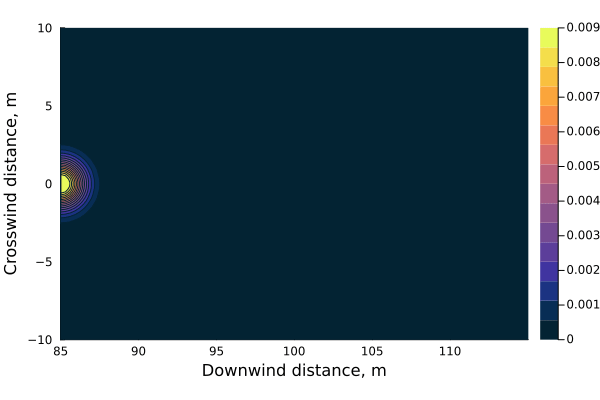

In [7]:
@gif for t′ in range(0.85*t,1.15*t, length=50)

plot(pf, t′; xlims=(0.85*x,1.15*x), ylims=(-10,10), clims=(0,9e-3), aspect_ratio=:equal)
    
end